# Purpose of this notebook

This notebook is used to visualise the features from the numpy arrays extracted by extract_arrays.ipynb. It is not required in the data processing pipeline.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.preprocessing import LabelBinarizer
from matplotlib import pyplot as plt
import random

In [2]:
FEATURES_PATH = "data/my_20_sec_features-2022_05_21__11_42_45.npy"
LABELS_PATH = "data/my_20_sec_labels-2022_05_21__11_42_45.npy"

SEED = 42

In [3]:
with open(FEATURES_PATH, 'rb') as f:
    features = np.load(f)

with open(LABELS_PATH, 'rb') as f:
    labels = np.load(f)

In [4]:
(unique, counts) = np.unique(labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T

frequencies

array([['www.amazon.co.uk', '307'],
       ['www.bbc.co.uk', '269'],
       ['www.ebay.co.uk', '297'],
       ['www.facebook.com', '286'],
       ['www.google.co.uk', '301'],
       ['www.google.com', '310'],
       ['www.twitter.com', '290'],
       ['www.uwe.ac.uk', '320'],
       ['www.wikipedia.com', '308'],
       ['www.youtube.com', '312']], dtype='<U21')

([<matplotlib.patches.Wedge at 0x13e48b850>,
 [Text(-0.3791762722172905, 1.1385189302718683, 'www.amazon.co.uk'),
  Text(-0.9581104444309886, 0.722512544024153, 'www.bbc.co.uk'),
  Text(-1.1982890149084076, 0.06405807326042982, 'www.ebay.co.uk'),
  Text(-1.0185446425281934, -0.6344815294215546, 'www.facebook.com'),
  Text(-0.46617696180120427, -1.1057481812265388, 'www.google.co.uk'),
  Text(0.28624007235431115, -1.165361154740709, 'www.google.com'),
  Text(0.9165551724790867, -0.7745492984967657, 'www.twitter.com'),
  Text(1.1976320680469255, -0.07534871986732586, 'www.uwe.ac.uk'),
  Text(0.9939072255322917, 0.6724198294478699, 'www.wikipedia.com'),
  Text(0.38513239263430826, 1.13651794536812, 'www.youtube.com')],
 [Text(-0.22118615879341946, 0.6641360426585898, '10.2%'),
  Text(-0.5588977592514099, 0.4214656506807559, '9.0%'),
  Text(-0.6990019253632376, 0.0373672094019174, '9.9%'),
  Text(-0.5941510414747794, -0.37011422549590683, '9.5%'),
  Text(-0.2719365610507025, -0.64501977238

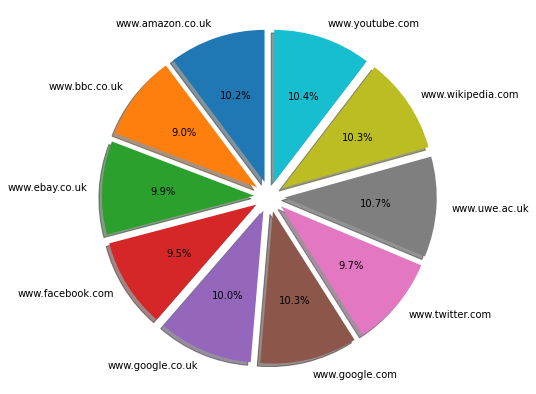

In [5]:
explode = [0.1] * len(frequencies[:,0])
plt.figure(figsize=(7,7))
plt.pie(frequencies[:,1], labels=frequencies[:,0], explode=explode, shadow=True, startangle=90, autopct='%1.1f%%')

In [6]:
max = features.max()
print(f"Max value: {max}")
features_scaled = features/max

Max value: 761.0


(array([516., 773., 181., 239., 194., 175., 152.,  74.,  82.,  60.,  51.,
         45., 137.,  34.,  20.,  11.,   5.,   3.,   7.,   7.,  16.,  12.,
         14.,   7.,   4.,   3.,   1.,   5.,   1.,   1.,   1.,   2.,   3.,
          5.,   6.,   5.,  11.,  23.,  36.,  42.,  22.,   5.,   4.,   3.,
          0.,   0.,   1.,   0.,   0.,   1.]),
 array([  6. ,  21.1,  36.2,  51.3,  66.4,  81.5,  96.6, 111.7, 126.8,
        141.9, 157. , 172.1, 187.2, 202.3, 217.4, 232.5, 247.6, 262.7,
        277.8, 292.9, 308. , 323.1, 338.2, 353.3, 368.4, 383.5, 398.6,
        413.7, 428.8, 443.9, 459. , 474.1, 489.2, 504.3, 519.4, 534.5,
        549.6, 564.7, 579.8, 594.9, 610. , 625.1, 640.2, 655.3, 670.4,
        685.5, 700.6, 715.7, 730.8, 745.9, 761. ]),
 <BarContainer object of 50 artists>)

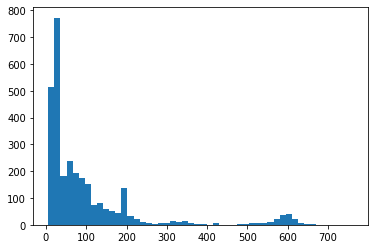

In [11]:
maxes = [arr.max() for arr in features]
plt.hist(maxes, bins=50)

In [8]:
unique_labels = np.unique(labels)

In [9]:
labels_df = pd.DataFrame(labels, columns=["label"])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

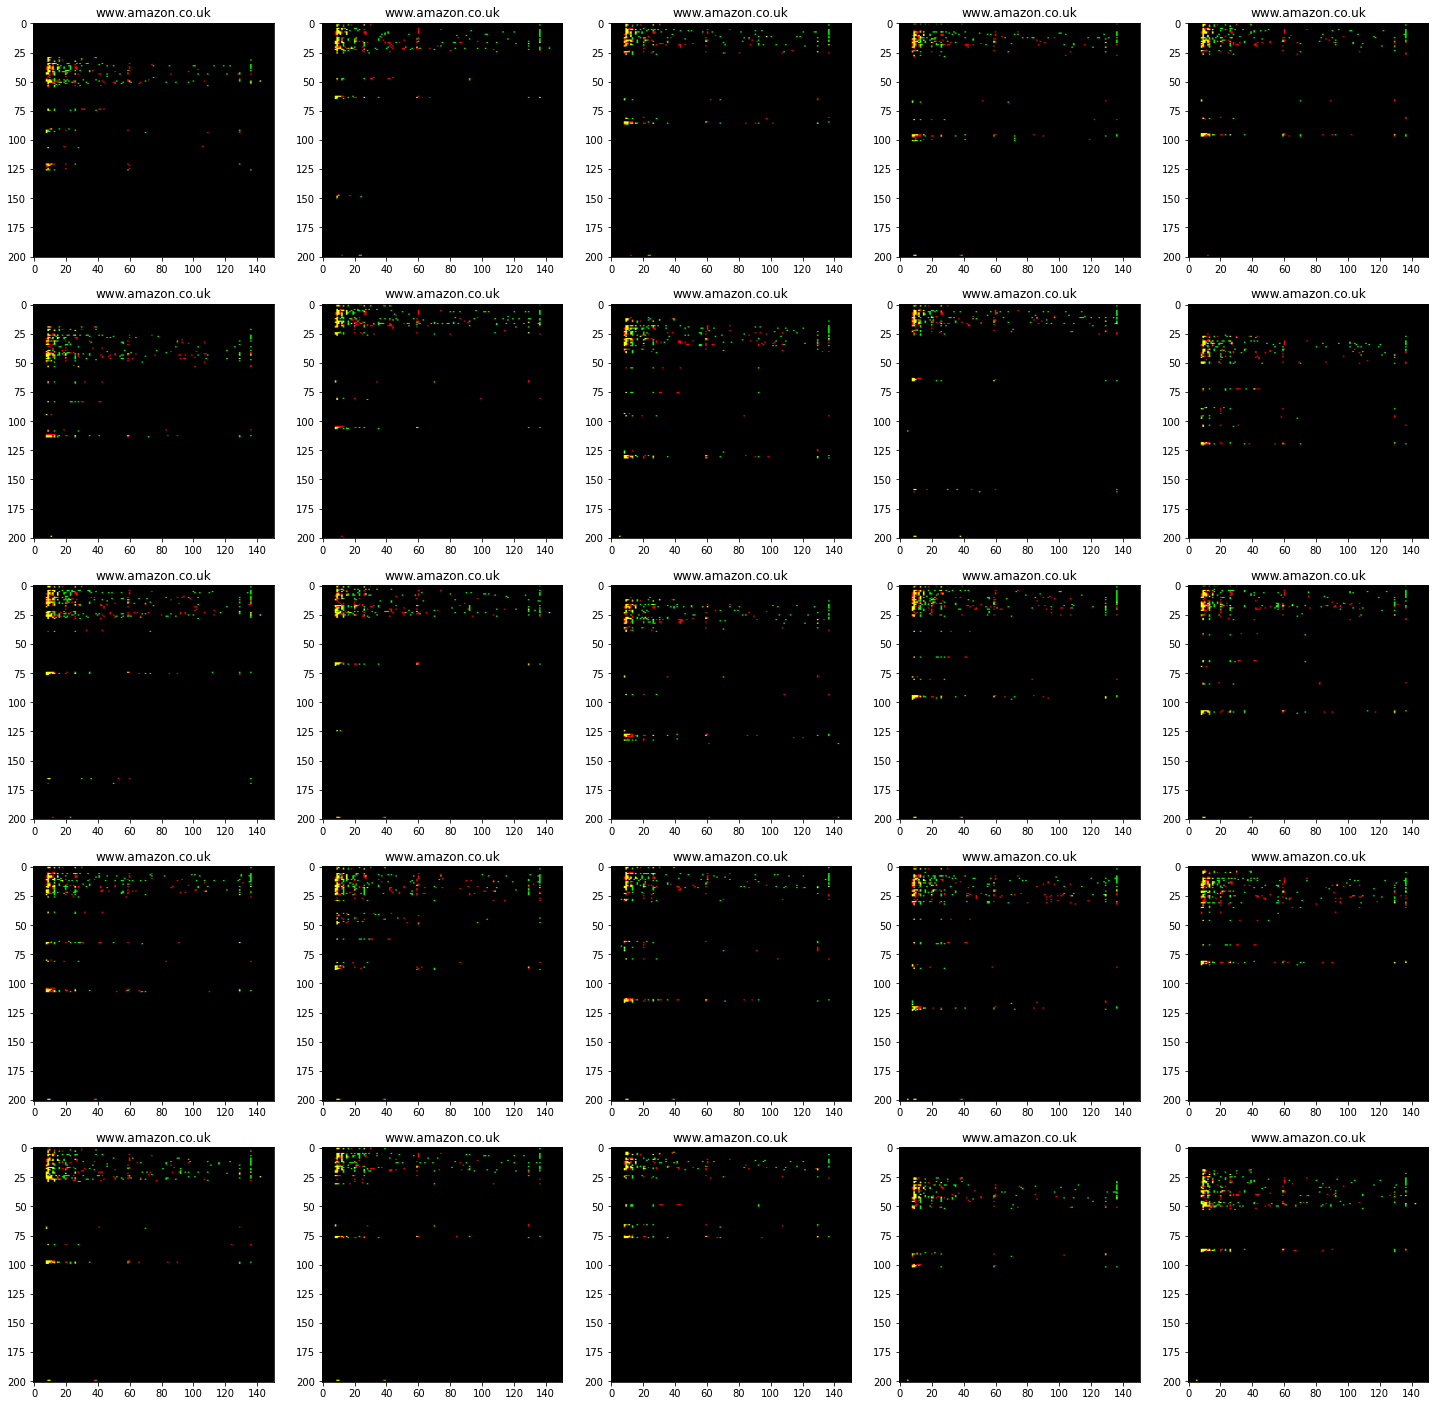

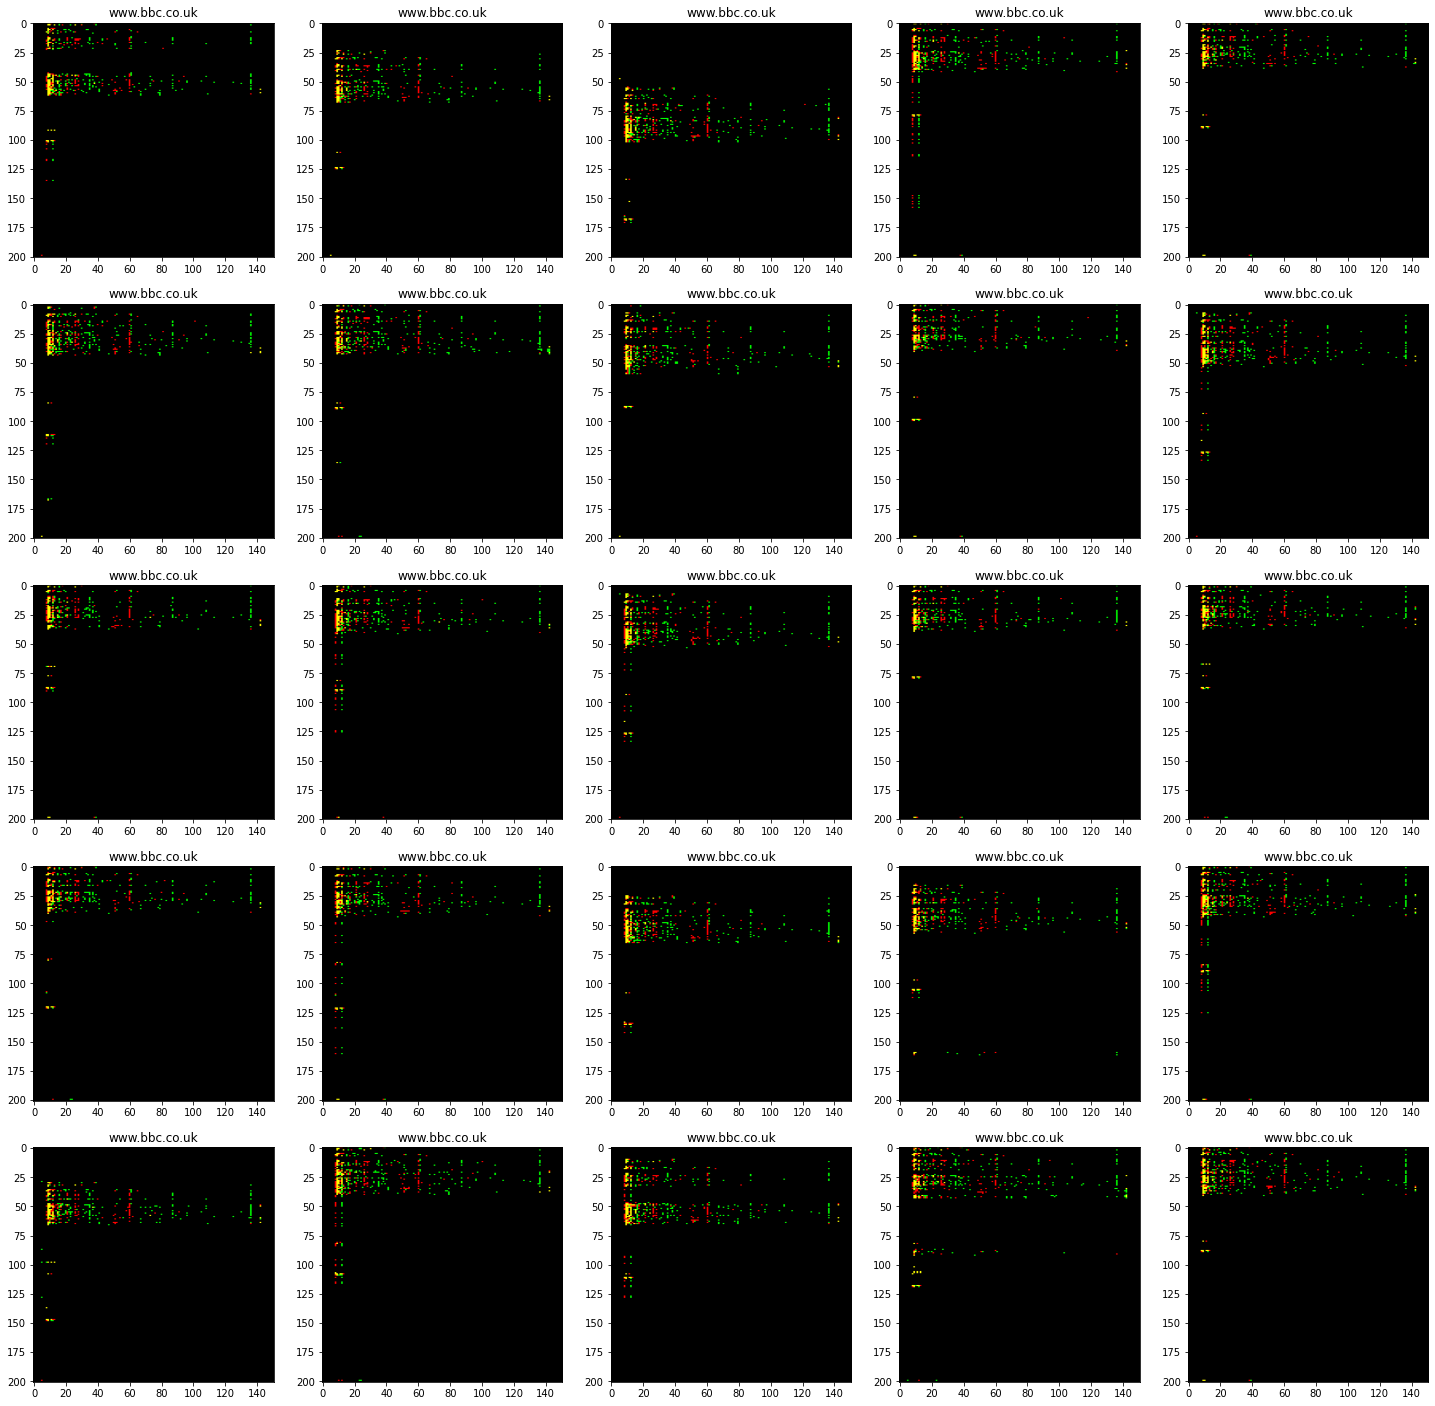

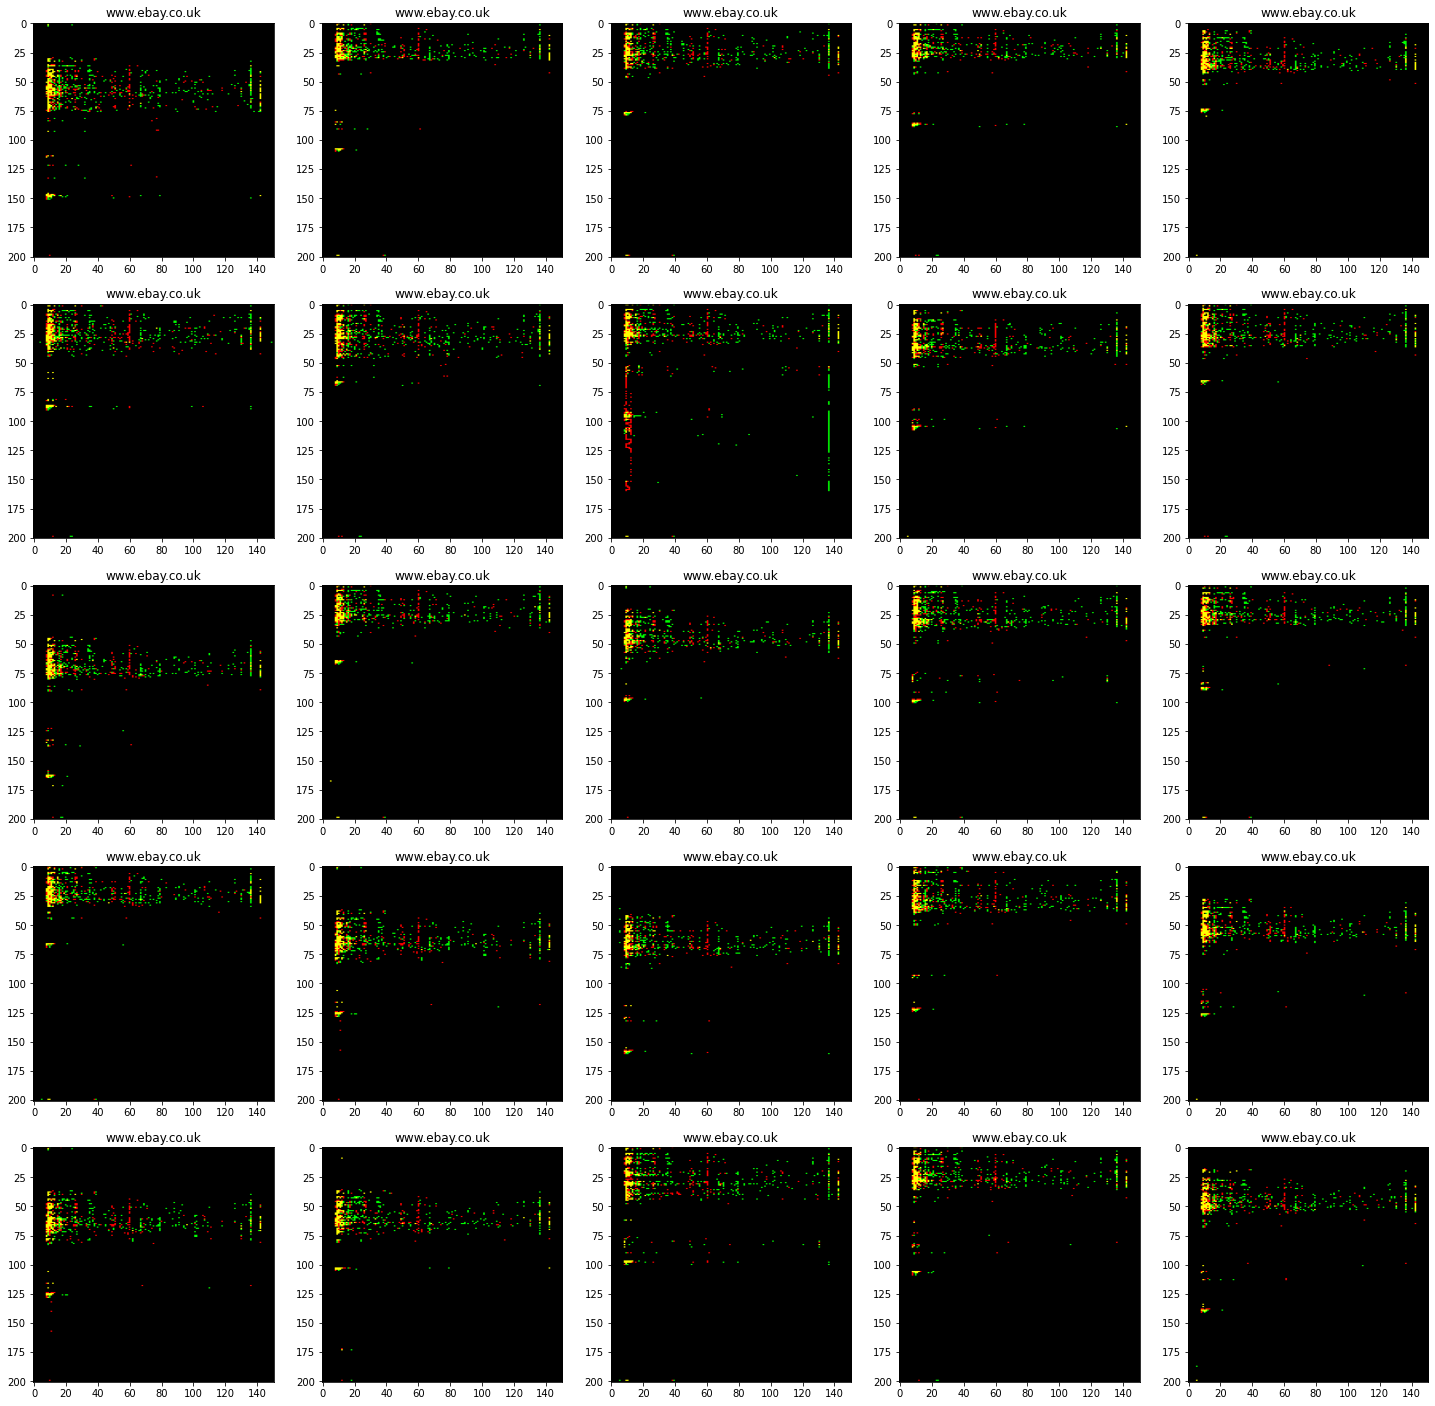

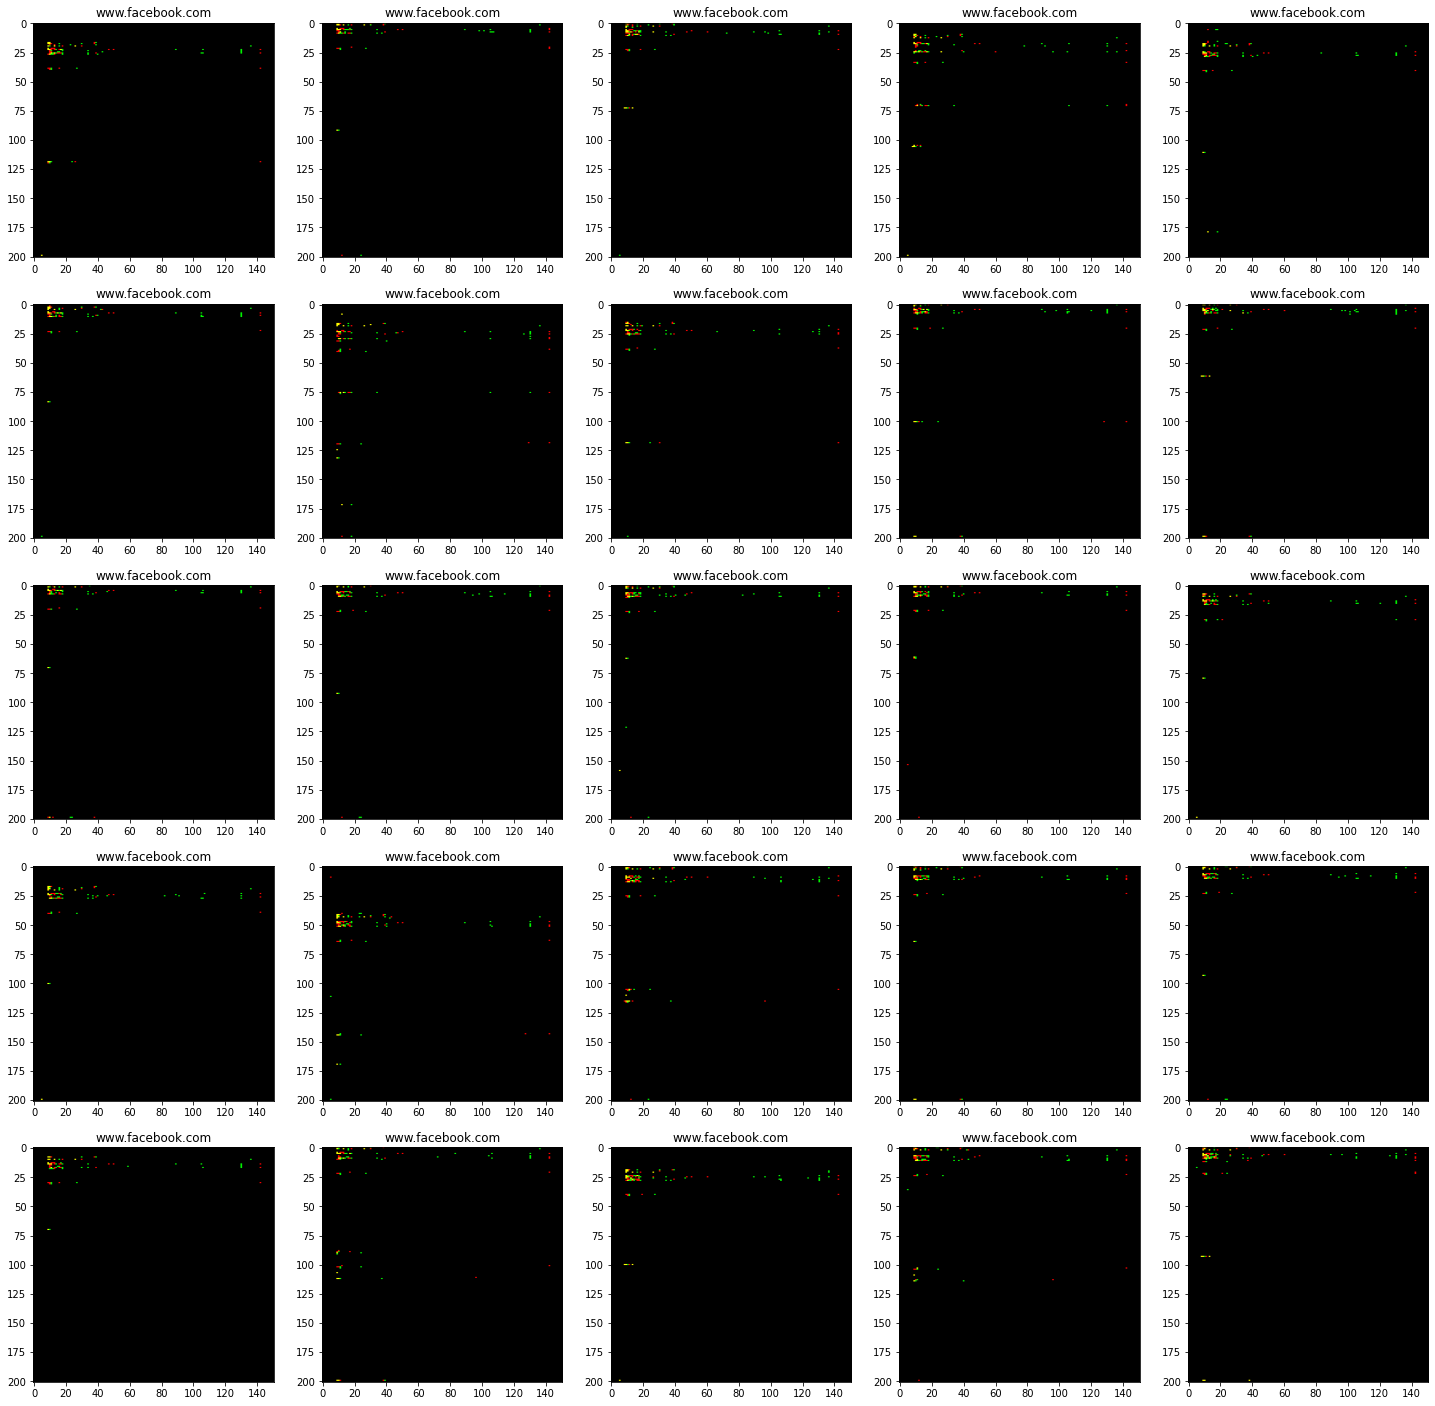

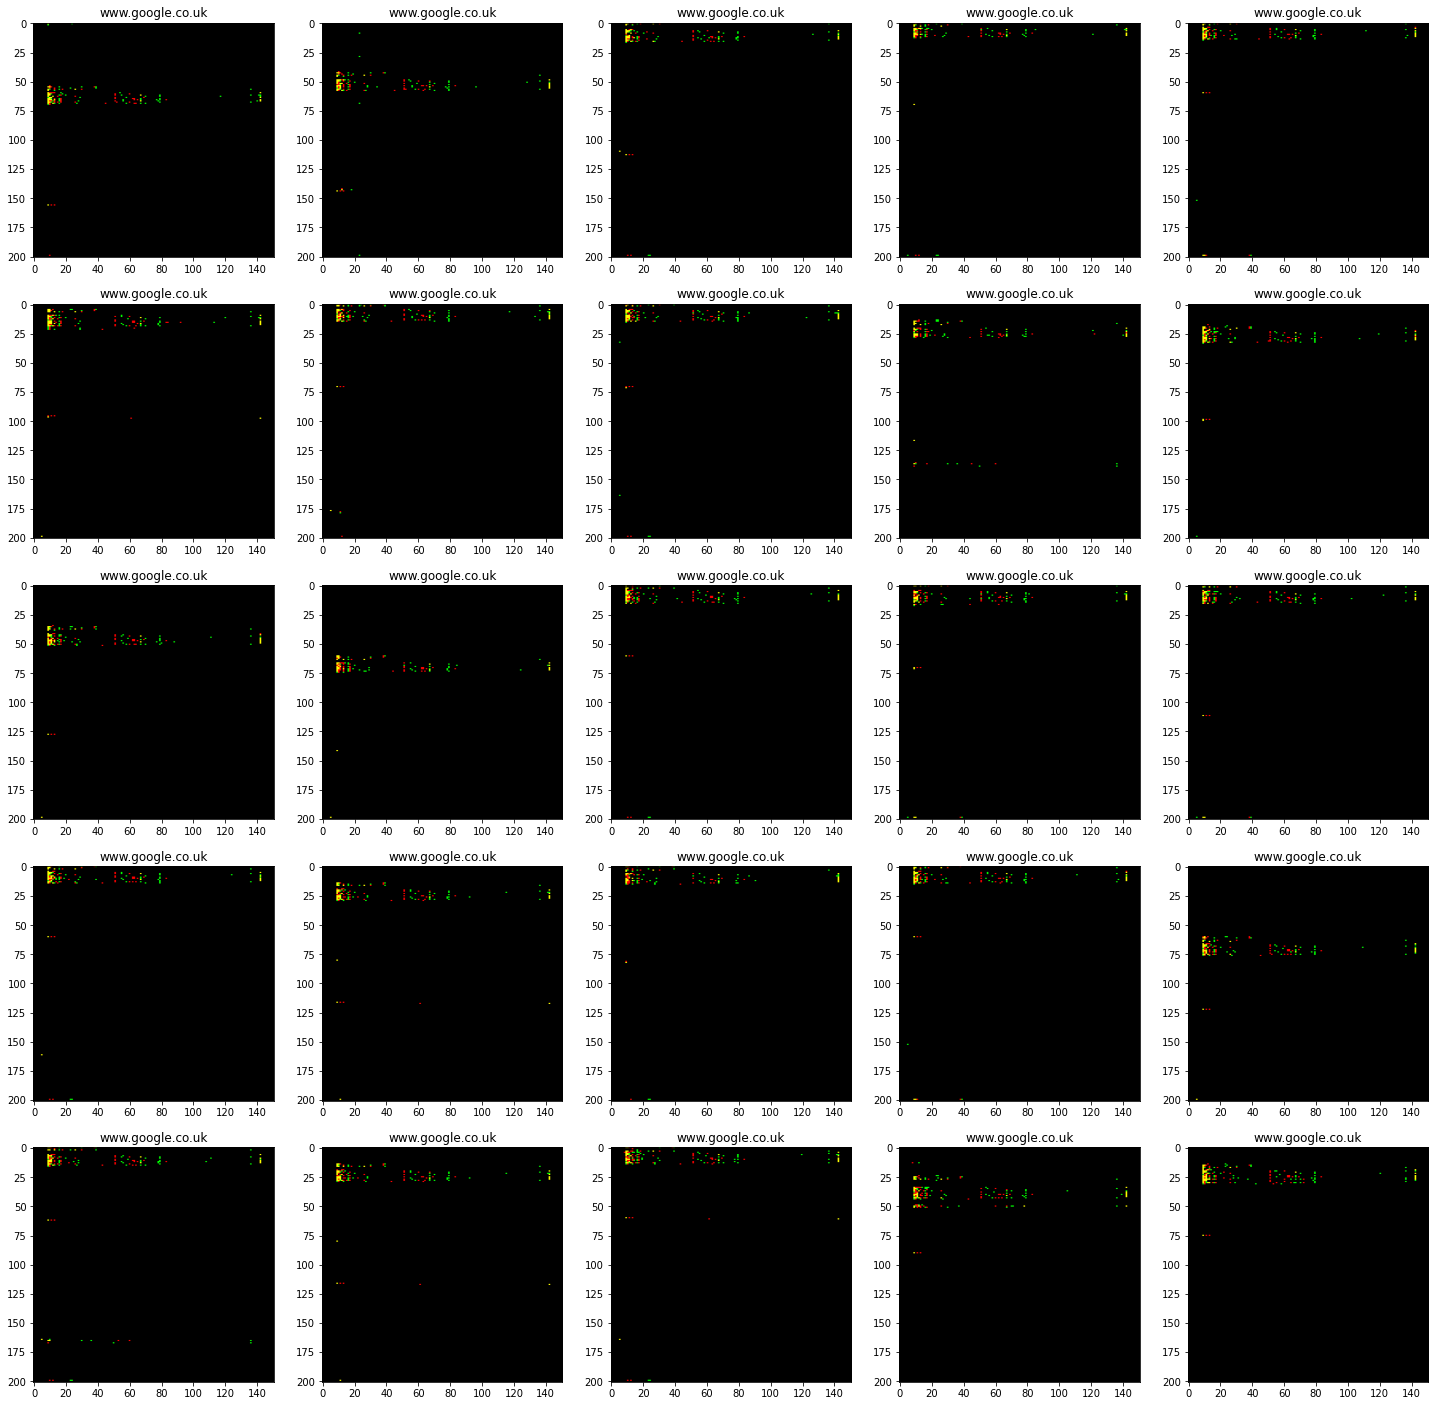

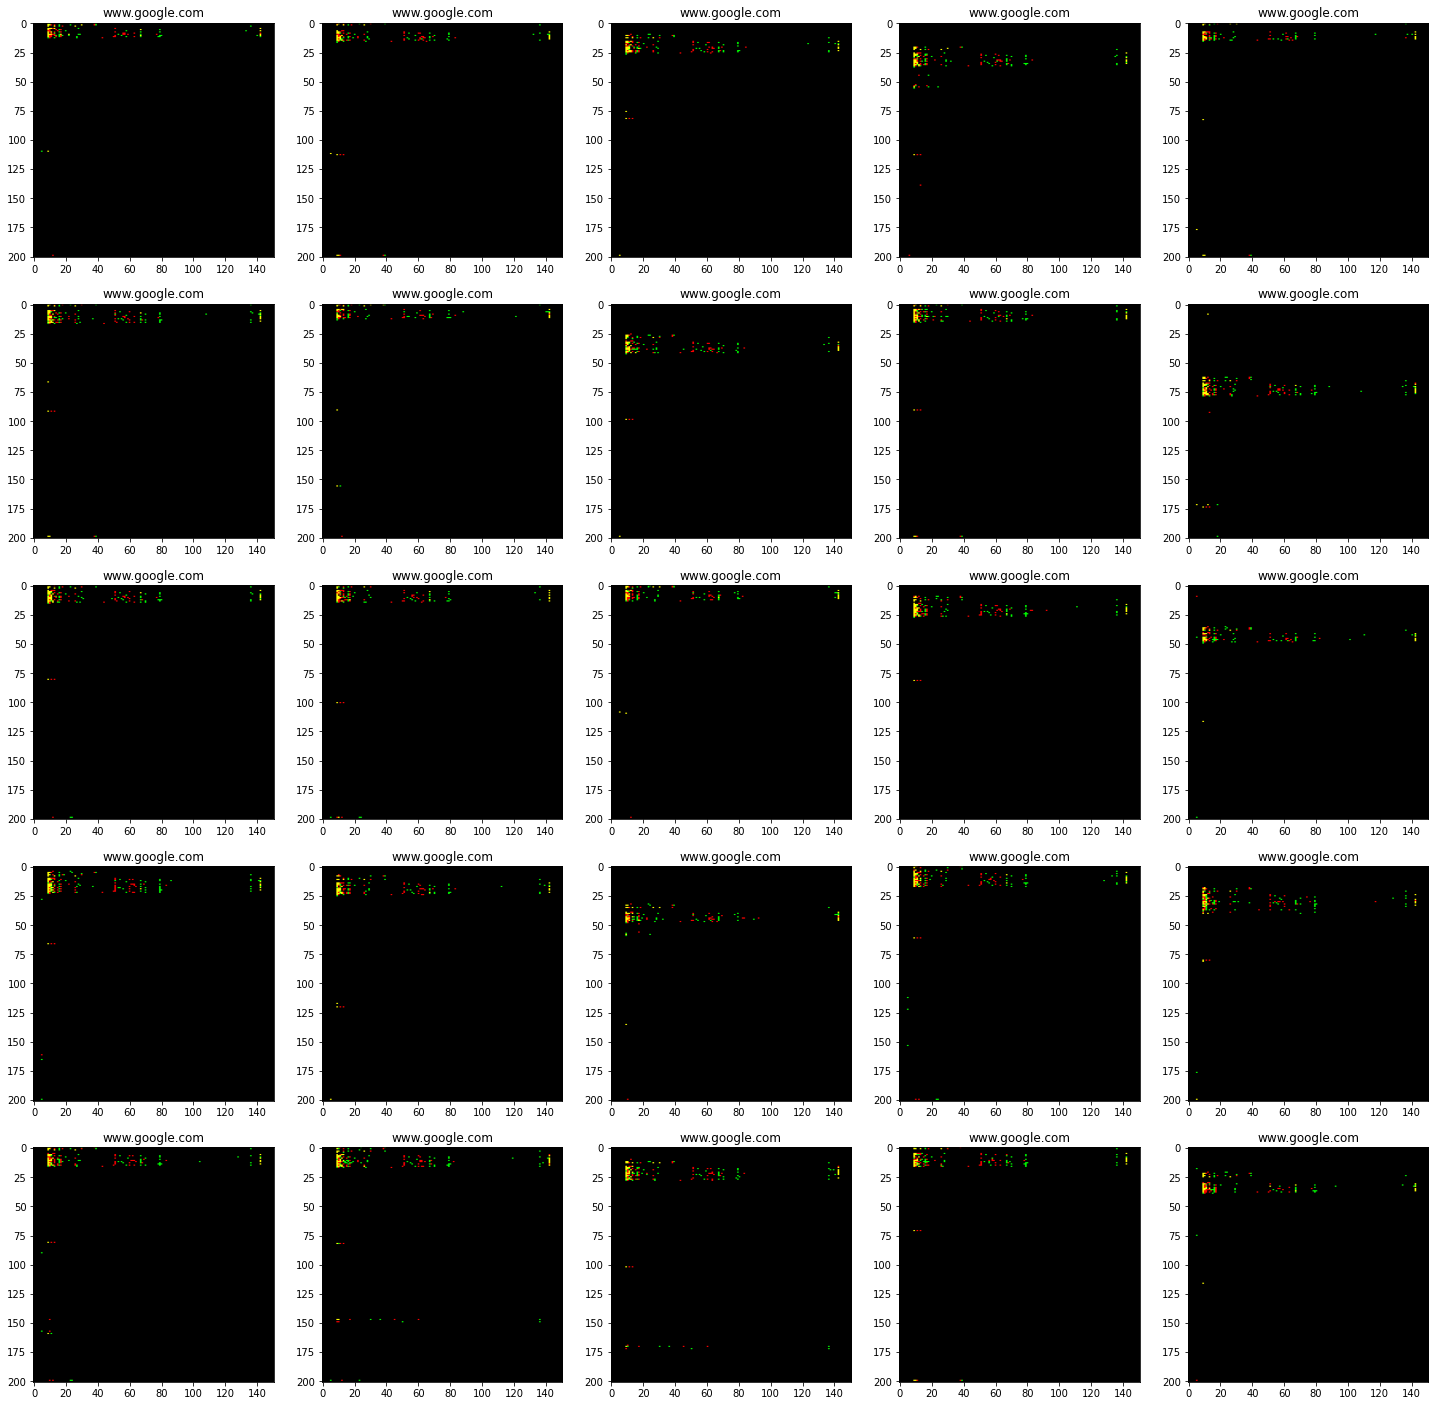

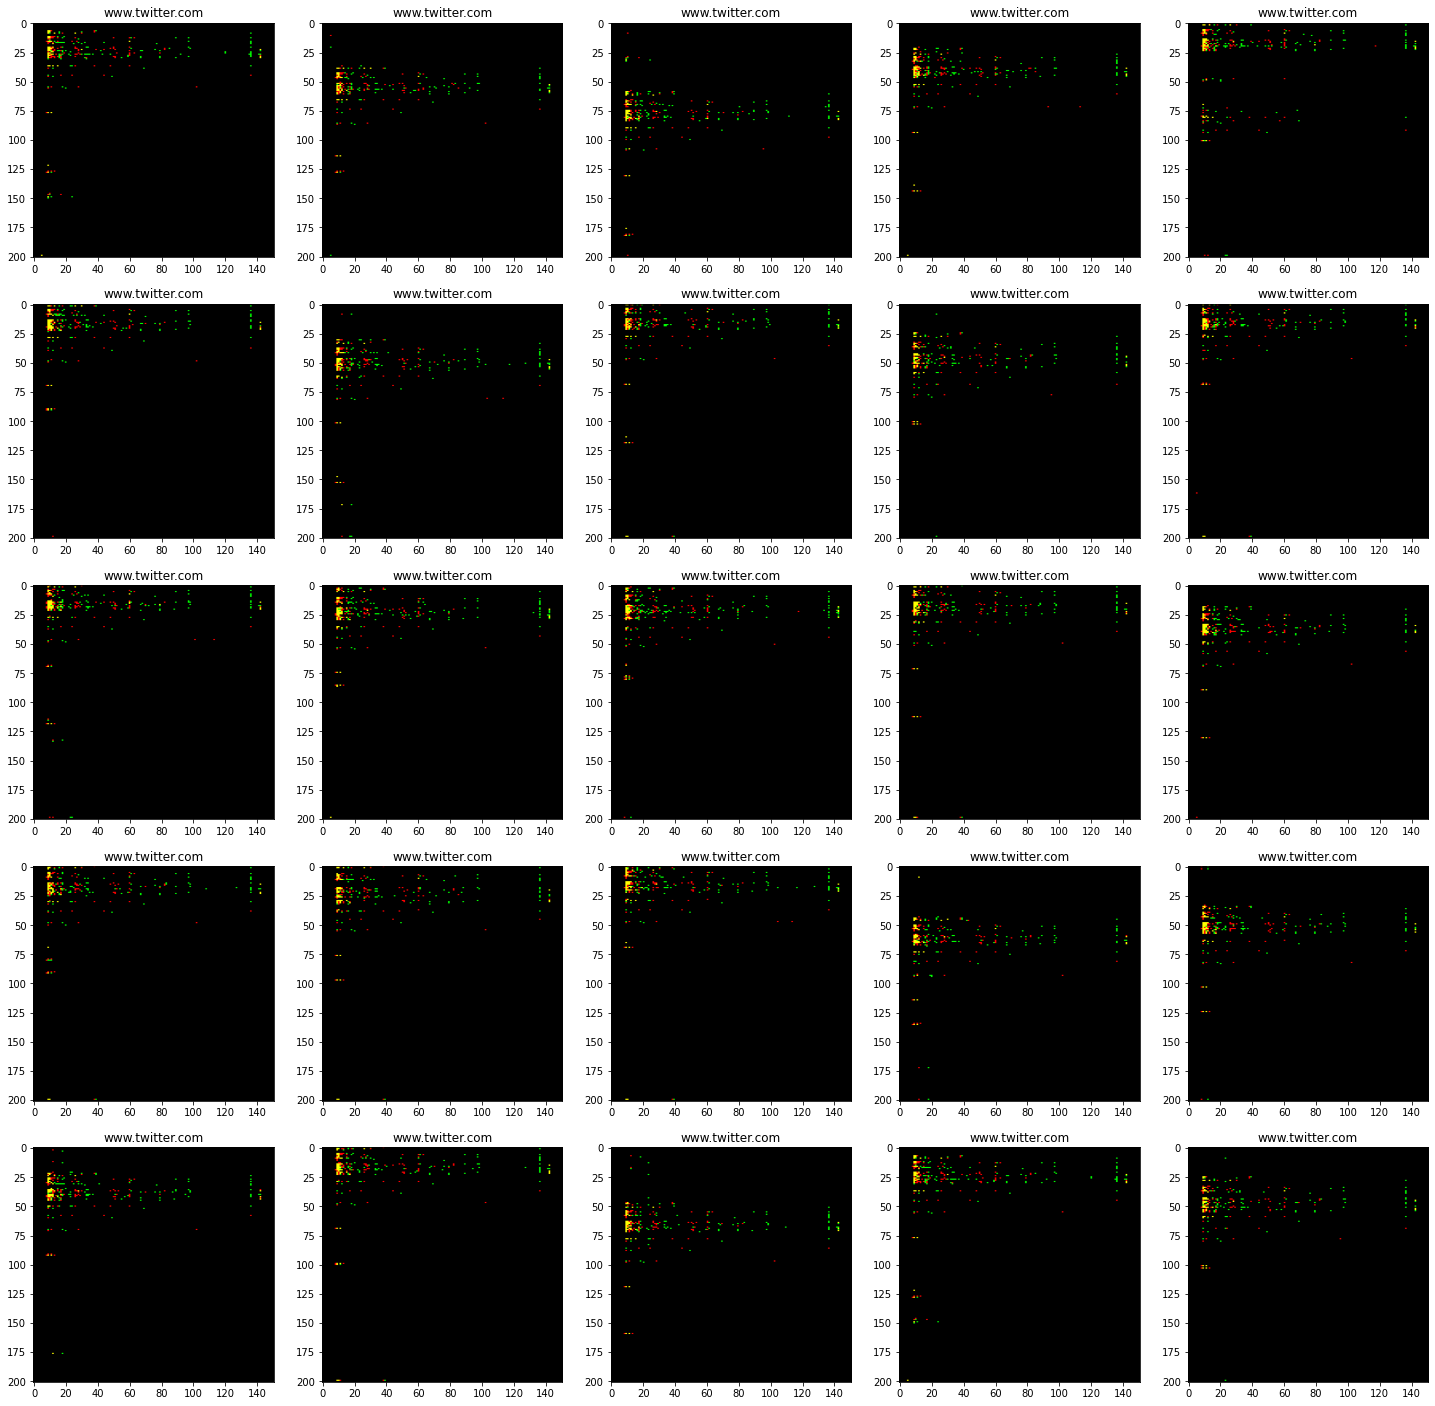

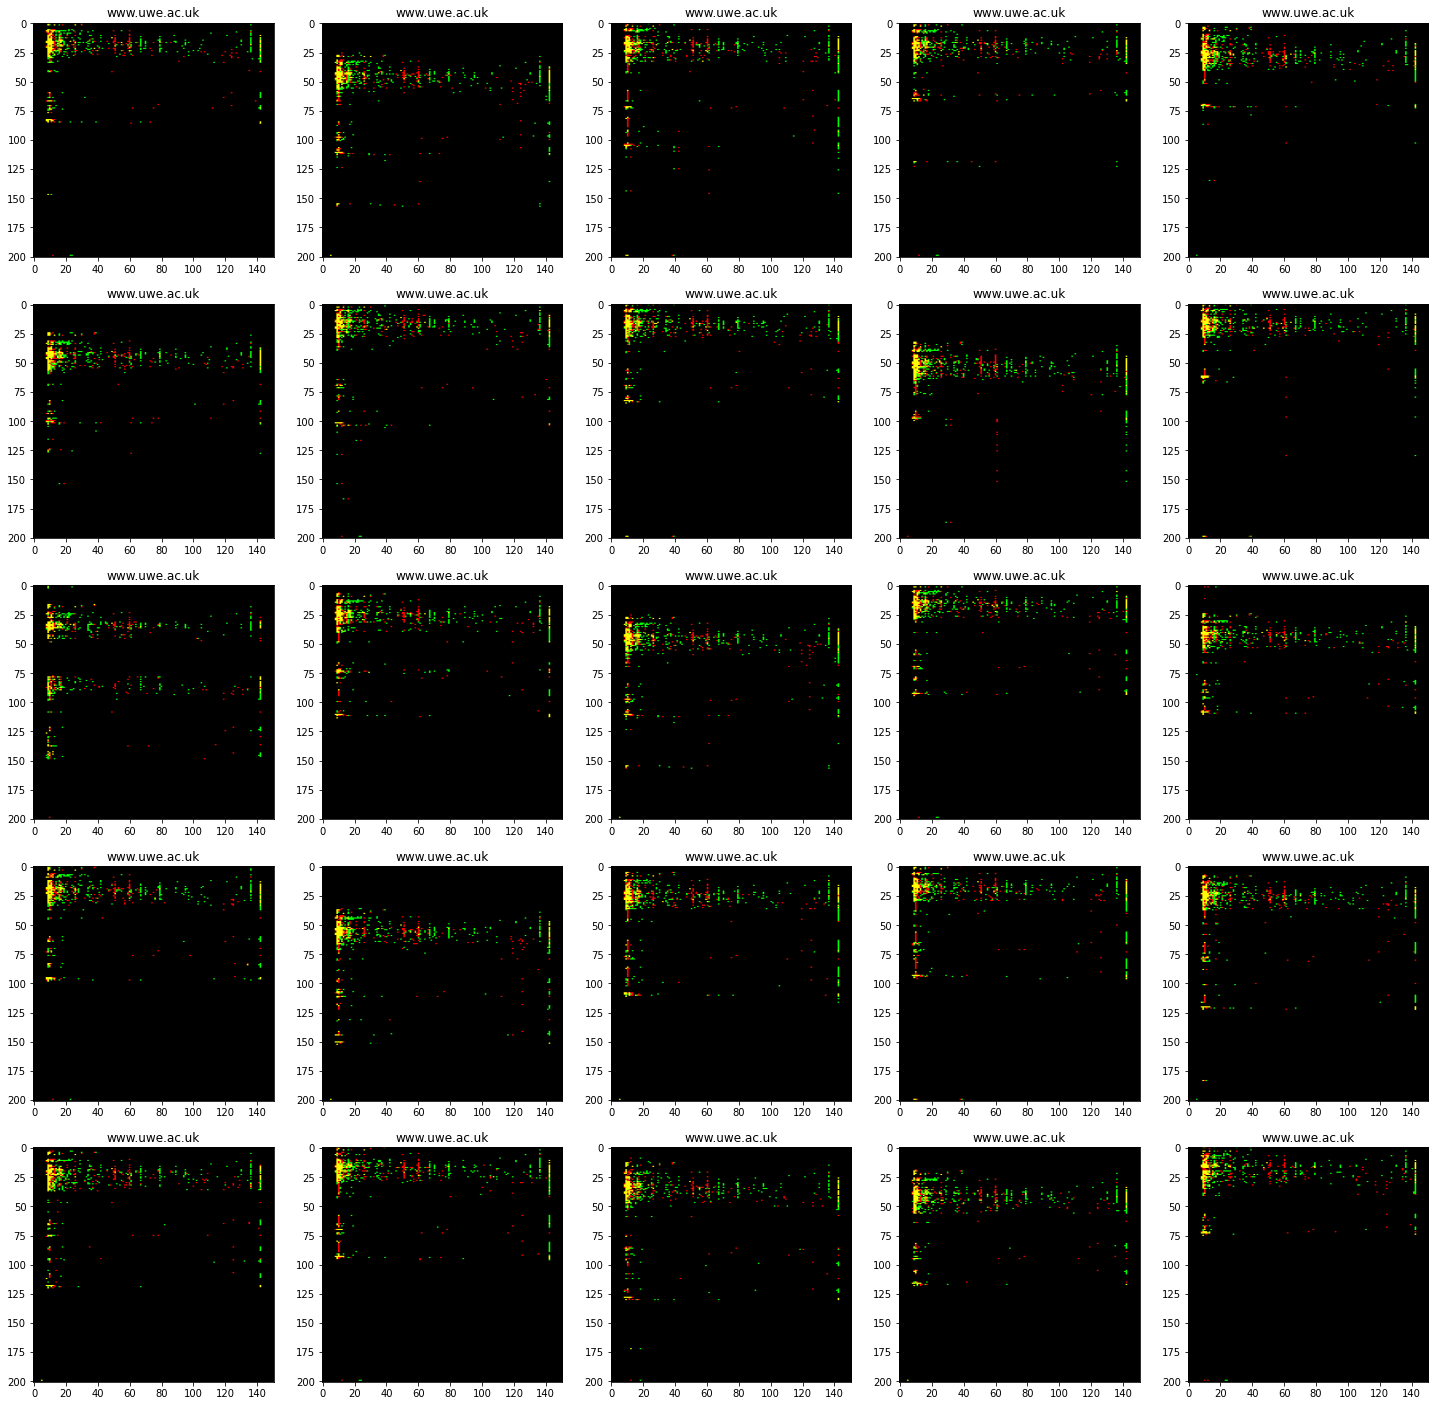

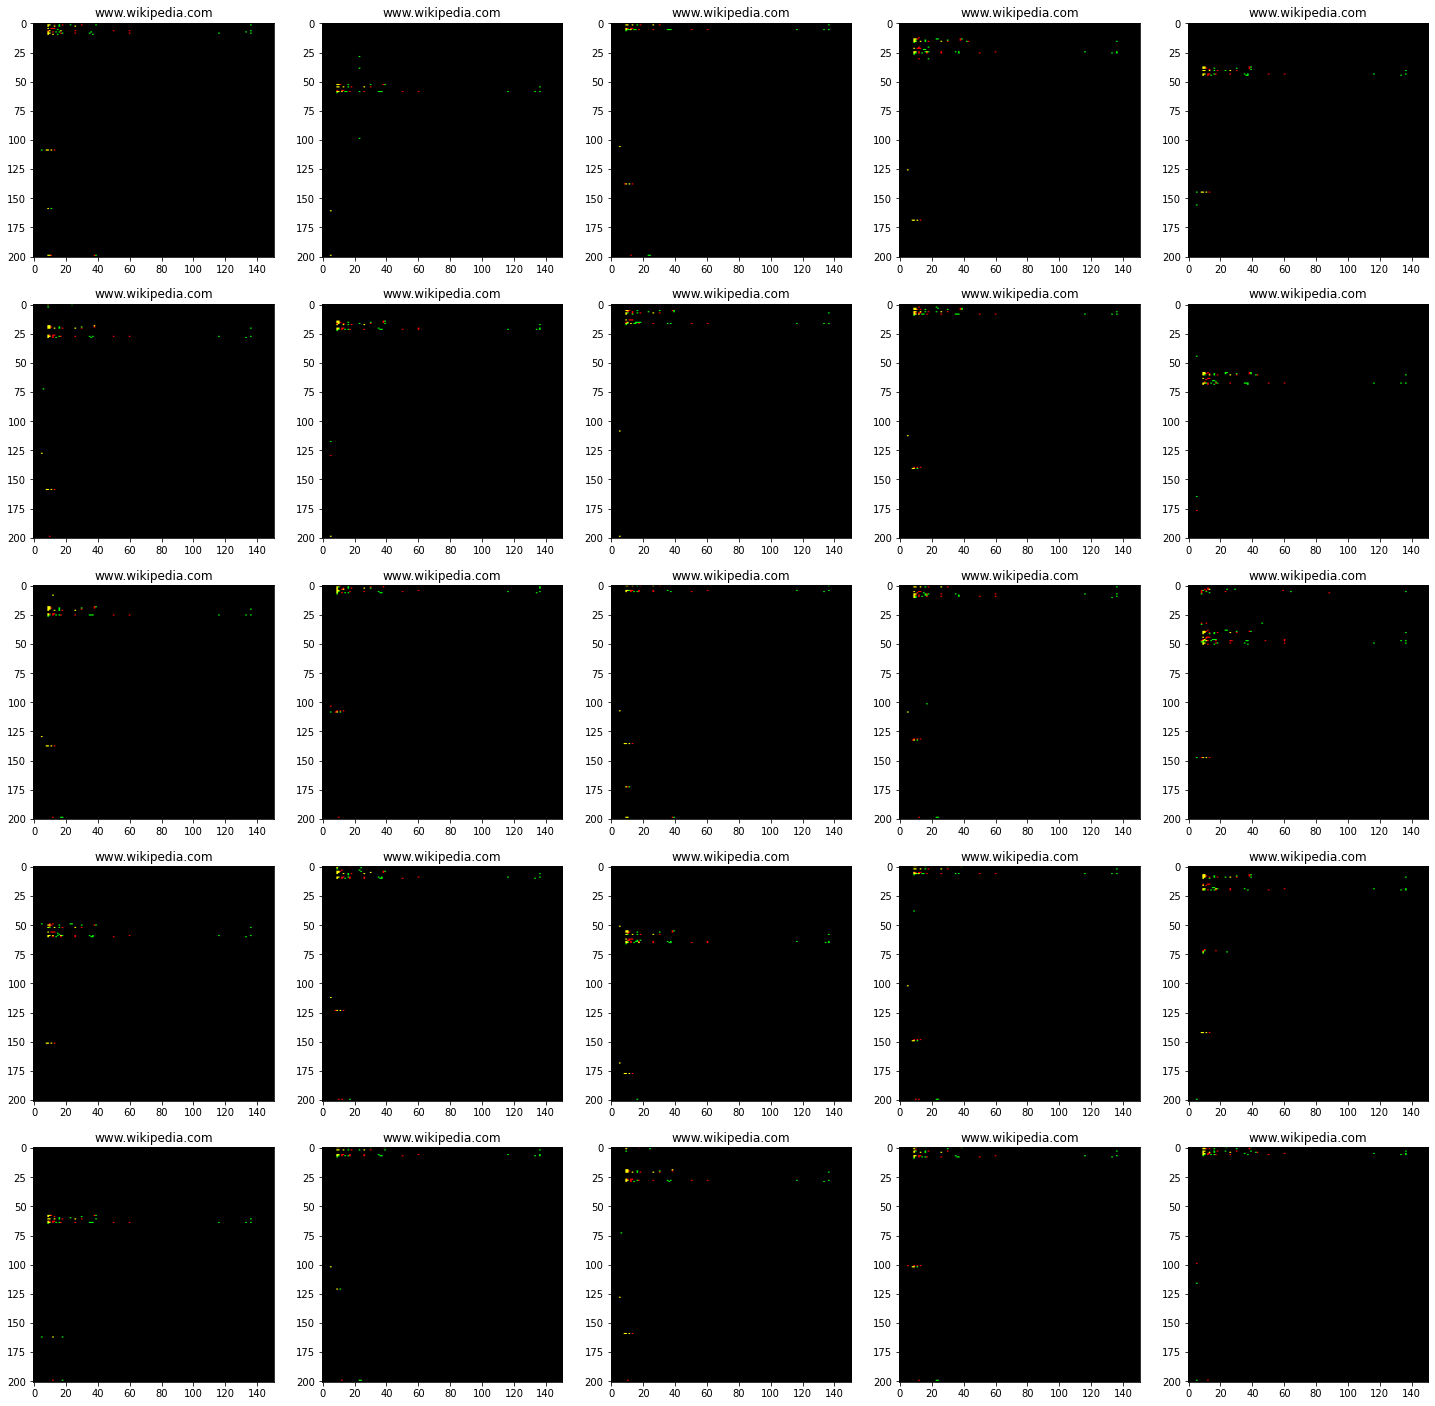

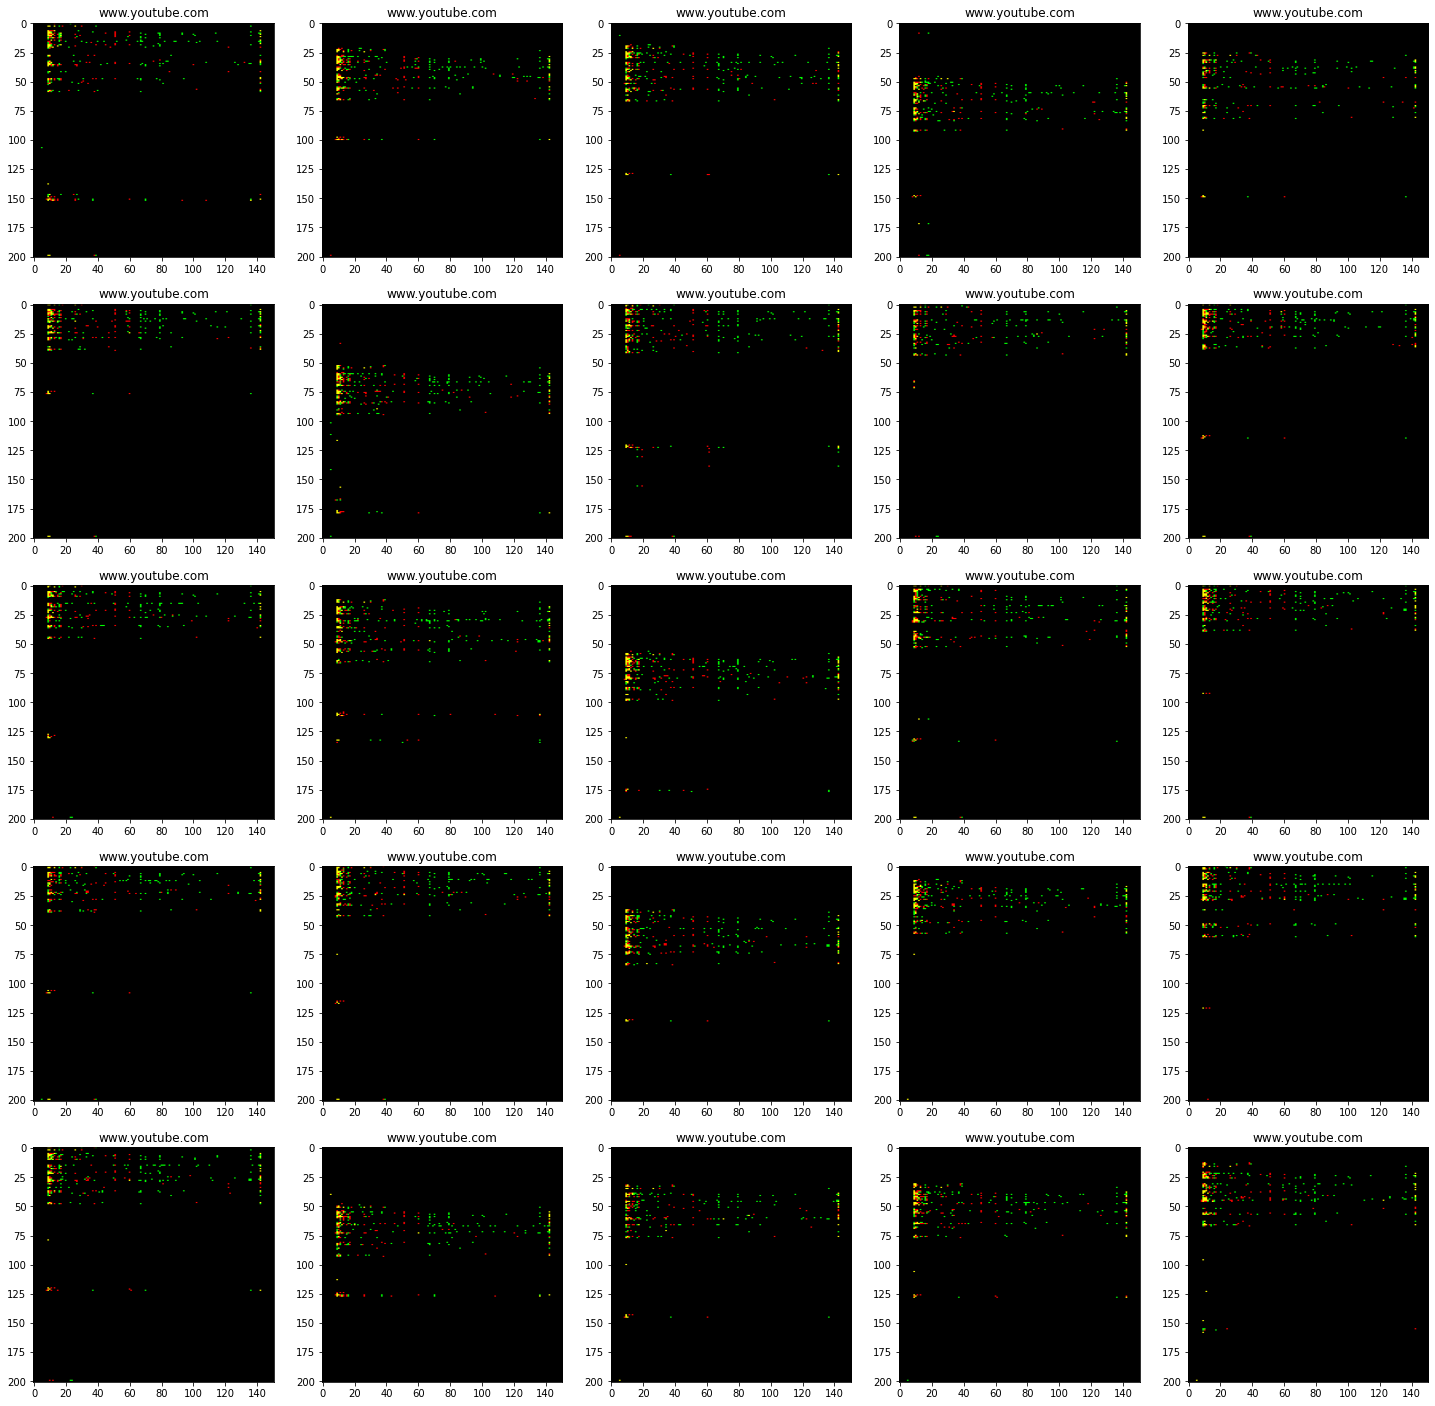

In [10]:
for label in unique_labels:

    indexes = labels_df[labels_df.label == label].index

    plt.figure(figsize=(25,25))

    
    for i in range(25):
        plt.subplot(5, 5, i +1)
        random_idx = random.randint(0, len(indexes) -1)
        plt.imshow(np.pad(features[indexes[random_idx]], (0,1)), aspect="auto")
        plt.title(f"{label}")